In [52]:
import os
import random
import time
import glob
import json
import dit
from dit import Distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
os.chdir("../")
from helpers.compare_helpers import load_frame
from helpers.helpers import SeabornFig2Grid
os.chdir('./plot_notebooks')

In [53]:
# load file
states = 3
dist_type = 'all'
name = dist_type +'states'+str(states)
folder = '../../results/test/'
    
os.chdir(folder)
allfiles = glob.glob("*.pkl")
files = [file for file in allfiles if name in file]
d = pd.concat([pd.read_pickle(f) for f in files])
dexploded = load_frame(d=d)
os.chdir('../../code/plot_notebooks')

In [54]:
# get WMS per run
srs = d[['systemID','runID']].copy()
srsexp = dexploded[['systemID','runID','syn_upper','WMS(X;S)','I(Xi;S)','I(X;S)']].copy()

def sumWMS(row):
    cur = srsexp[(srsexp['systemID']==row['systemID'])&(srsexp['runID']==row['runID'])]
    if len(cur)>0:
        row['sum I(X;S)'] = cur['I(X;S)'].sum()
        row['totwms'] = cur['WMS(X;S)'].sum()
        row['sum I(Xi;S)'] = sum(cur['I(Xi;S)'].sum())
    else:
        row['totwms'] = 0
    return row

d = d.apply(lambda row:sumWMS(row),axis=1)
d['wmsnorm'] = d['totwms']/d['syn_upper']
d['H(X0)'] = d.apply(lambda row: round(row['H(Xi)'][0],1),axis=1)
d['H(X1)'] = d.apply(lambda row: round(row['H(Xi)'][1],1),axis=1)
d

,exp_sort,systemID,syn_upper,lenS,srv_data,parXY,H(Xi),I(X1;X2),runID,tot_runtime,...,exp,save,folder,rowfolder,sum I(X;S),totwms,sum I(Xi;S),wmsnorm,H(X0),H(X1)
0,syndisc,0,1.500000,NaN,"[[1.5, 1.25, [0.0, 0.0], [0.125, 0.125, 0.0, 1...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]","[1.5, 1.5]",0.000000,0.0,0.035899,...,0,True,../results/test/,/row_data/,1.250000,1.250000,0.000000e+00,0.833333,1.5,1.5
1,syndisc,1,1.489787,NaN,"[[1.8571323081513464, 1.1627213661969673, [1.4...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.66666666...","[1.5, 1.4974924140929848]",0.007705,0.0,0.010200,...,0,True,../results/test/,/row_data/,1.162721,1.162721,2.885692e-12,0.780461,1.5,1.5
2,syndisc,2,1.456253,NaN,"[[1.9847627568057655, 1.0694318297615206, [1.4...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.83333333...","[1.5, 1.4899343783255763]",0.033682,0.0,0.021168,...,0,True,../results/test/,/row_data/,1.069432,1.069432,2.884359e-12,0.734372,1.5,1.5
3,syndisc,3,1.375000,NaN,"[[1.832262897023245, 0.9351636136901269, [1.44...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0]","[1.5, 1.4772170014624826]",0.102217,0.0,0.015622,...,0,True,../results/test/,/row_data/,0.935164,0.935164,2.885692e-12,0.680119,1.5,1.5
4,syndisc,4,1.437907,NaN,"[[2.0038951277761727, 0.9513077279595383, [1.4...","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6666666666666...","[1.5, 1.4533181615193034]",0.015411,0.0,0.015620,...,0,True,../results/test/,/row_data/,0.951308,0.951308,2.886136e-12,0.661592,1.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,syndisc,65531,0.000000,NaN,"[[0.0, 0.0, [0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0...","[1.0, 0, 1.0, 0, 0.3333333333333333, 0.4999999...","[-0.0, -0.0]",0.000000,0.0,0.010097,...,0,True,../results/test/,/row_data/,0.000000,0.000000,0.000000e+00,NaN,-0.0,-0.0
65532,syndisc,65532,0.000000,NaN,"[[0.0, 0.0, [0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0...","[1.0, 0, 1.0, 0, 0.3333333333333333, 0.4999999...","[-0.0, -0.0]",0.000000,0.0,0.010131,...,0,True,../results/test/,/row_data/,0.000000,0.000000,0.000000e+00,NaN,-0.0,-0.0
65533,syndisc,65533,0.000000,NaN,"[[0.0, 0.0, [0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0...","[1.0, 0, 1.0, 0, 0.3333333333333333, 0.4999999...","[-0.0, -0.0]",0.000000,0.0,0.020239,...,0,True,../results/test/,/row_data/,0.000000,0.000000,0.000000e+00,NaN,-0.0,-0.0
65534,syndisc,65534,0.000000,NaN,"[[0.0, 0.0, [0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0...","[1.0, 0, 1.0, 0, 0.3333333333333333, 0.4999999...","[-0.0, -0.0]",0.000000,0.0,0.010116,...,0,True,../results/test/,/row_data/,0.000000,0.000000,0.000000e+00,NaN,-0.0,-0.0


In [49]:
# d = d[d['H(X0)']==d['H(X0)'].max()]
d.keys()

Index(['exp_sort', 'systemID', 'syn_upper', 'lenS', 'srv_data', 'parXY',
       'H(Xi)', 'I(X1;X2)', 'runID', 'tot_runtime', 'syn_info', 'lenX', 'lenY',
       'states', 'dist_type', 'num_srvs', 'systems', 'prev', 'exp', 'save',
       'folder', 'rowfolder', 'totwms', 'sum I(Xi;S)', 'wmsnorm', 'H(X0)',
       'H(X1)', 'sum I(X;S)'],
      dtype='object')

## Find interesting relations

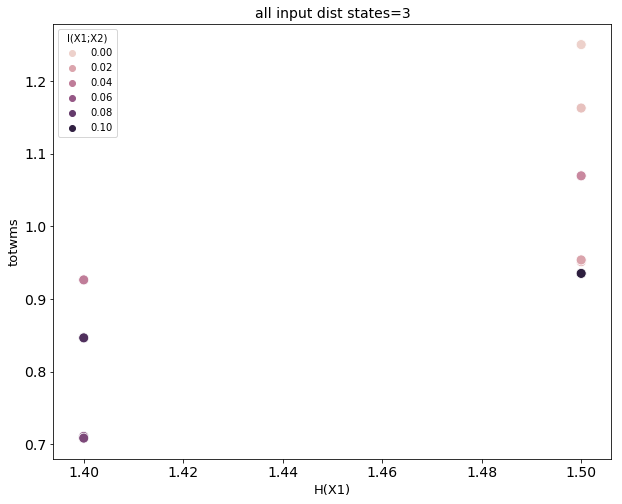

In [50]:
fig, ax = plt.subplots(figsize=(10,8))        
xcol = 'H(X1)'
ycol = 'totwms'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='I(X1;X2)',
                sizes=(10,80),s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()

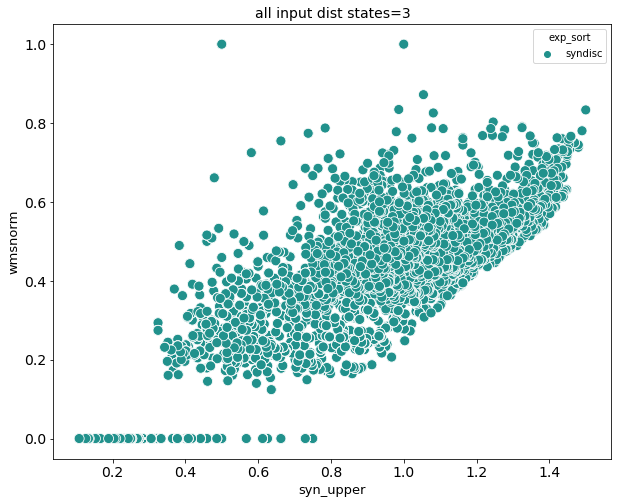

In [81]:
fig, ax = plt.subplots(figsize=(10,8))        
xcol = 'syn_upper'
ycol = 'wmsnorm'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='exp_sort',palette='viridis',
                sizes=(30,120),s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()

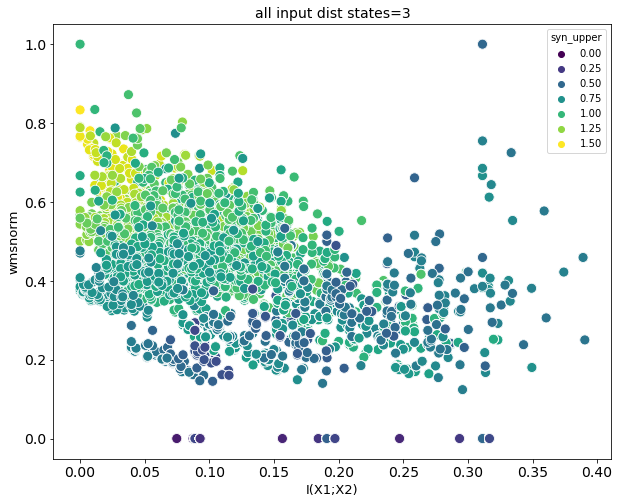

In [82]:
fig, ax = plt.subplots(figsize=(10,8))        
xcol = 'I(X1;X2)'
ycol = 'wmsnorm'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='syn_upper',palette='viridis',
                sizes=(30,120),s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()

## Find interesting found srvs

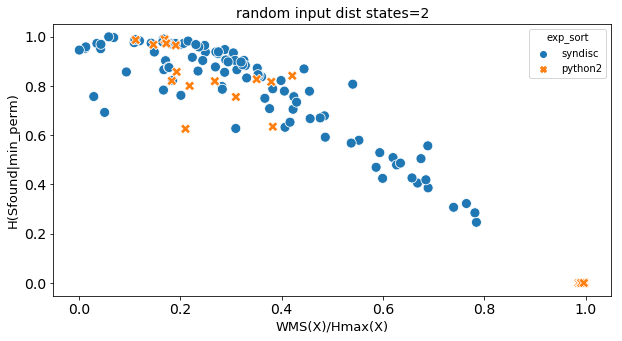

In [5]:
fig, ax = plt.subplots(figsize=(10,5))        
xcol = 'WMS(X)/Hmax(X)'
ycol = 'H(Sfound|min_perm)'

sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue='exp_sort',style='exp_sort',
                sizes=(10,60),palette='tab10',s=100,ax=ax)

title = dist_type+" input dist states="+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.show()